# CHAPTER 34: Expectation Propagation

### This code generates figure 2 from Chapter 34: Expectation Propagation (vol II)
TEXT: A. H. Sayed, INFERENCE AND LEARNING FROM DATA, Cambridge University Press, 2022.

<div style="text-align: justify">
DISCLAIMER:  This computer code is  provided  "as is"   without  any  guarantees.
Practitioners  should  use it  at their own risk.  While  the  codes in  the text 
are useful for instructional purposes, they are not intended to serve as examples 
of full-blown or optimized designs. The author has made no attempt at optimizing 
the codes, perfecting them, or even checking them for absolute accuracy. In order 
to keep the codes at a level  that is  easy to follow by students, the author has 
often chosen to  sacrifice  performance or even programming elegance in  lieu  of 
simplicity. Students can use the computer codes to run variations of the examples 
shown in the text. 
</div>

The Jupyter notebook and python codes are developed by Eduardo Faria Cabrera

required libraries:
    
1. numpy
2. matplotlib

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

## Example 34.5 (Mixture of two Gaussian distributions)

We illustrate the steps of the  EP algorithm by considering an example with scalar variables for ease of exposition. Thus, consider a collection of $N$ observations $\{y(n)\}$ arising from a Gaussian mixture distribution of the form (here, the parameter $\theta$ plays the role of the latent variable $z$; its prior is Gaussian with mean $\bar{\theta}$ and variance $\sigma_{\theta}^2$):

$
\pi(\theta)=\frac{1}{\sqrt{2\pi\sigma_{\theta}^2}}e^{-\frac{1}{2}\theta^2}\;=\;{\cal N}_{\theta}(\bar{\theta},\sigma_{\theta}^2)\;\;\;\;\;(\textnormal{prior})\\
f_{n}(\theta)=(1-\alpha)\Bigg\{
\frac{1}{\sqrt{2\pi \sigma_1^2}}e^{-\frac{1}{2\sigma_1^2}(y(n)-\theta)^2}\Bigg\}\;+\;\alpha \,
\Bigg\{\frac{1}{\sqrt{2\pi \sigma_2^2}}e^{-\frac{1}{2\sigma_2^2}y^2(n)}\Bigg\}\\
=(1-\alpha) {\cal N}_{y(n)}(\theta ,\sigma_1^2)\;+\;\alpha{\cal N}_{y(n)}(0,\sigma_2^2),\;\;\alpha\in(0,1)
$

Note that $\theta$ influences the mean of the first Gaussian component in $f_n(\theta)$. We collect the observations into a column vector 

$
y=\textnormal{col}\Bigl\{y(1),y(2),\ldots,y(N)\Bigr\}
$

The posterior is given by

$
f_{\theta|y}(\theta|y)\;=\;\frac{1}{Z}\times \pi(\theta)\times \prod_{n=1}^N f_{n}(\theta)
$

for some normalization factor $Z$. 
Our objective is to approximate it by a product of Gaussian sites of the form

$
q_{\theta|y}(\theta|y)\;=\;\frac{1}{W}\prod_{n=0}^{N} q_n(\theta),\;\;\;\; q_n(\theta)\sim {\cal N}_{\theta}(\mu_n, r_n)
$

where each $q_n(\theta)$ is selected from the Gaussian family of distributions with some mean $\mu_n$ and variance $r_n$ to be determined.  We construct the sites iteratively using the EP algorithm, which involves several steps.
 
$ \textbf{Initialization} \textnormal{ at } \ell=0$

$
q_0^{(0)}(\theta)={\cal N}_{\theta}(\bar{\theta},\sigma_{\theta}^2),\;\;\;q_{n}^{(0)}(\theta)=1,\;n=1,2,\ldots, N\\
\mu_0^{(0)}=\bar{\theta},\;\;r_0^{(0)}=\sigma_{\theta}^2,\;\;\mu_n^{(0)}=0,\;\;\;
r_n^{(0)}=\infty\\
q_{\theta|y  }^{(0)}(\theta|y) = {\cal N}_{\theta}(\bar{\theta},\sigma_{\theta}^2)
$


We proceed iteratively for $\ell\geq 1$. 
Assume we know the factors $\{q_{n}^{(\ell-1)}(\theta)\}$ from iteration $\ell-1$ for all $n=0,1,2\ldots, N$, along with their means and variances, $\{\mu_n^{(\ell-1)}, r^{(\ell-1)}_n\}$. The global mean and variance for the $\{\mu^{(\ell-1)}, r^{(\ell-1)}\}$ for the posterior approximation at iteration $(\ell-1)$ are given by:

$
1/r^{(\ell-1)}=\sum_{n=0}^{N} 1/r_{n}^{(\ell-1)}\\
\mu^{(\ell-1)}= r^{(\ell-1)} \Bigg(\sum_{n=0}^{N}\mu_{n}^{(\ell-1)}/r_{n}^{(\ell-1)}\Bigg)
$

It can be easily verified from the recursive construction that we do not need to update the moments for the zeroth site $q_0^{(\ell-1)}(\theta)$; they will stay fixed at $\mu_0^{(\ell)}=\bar{\theta}$ and $r_0^{(\ell)}=\sigma_{\theta}^2$ for all $\ell\geq 1$. We therefore focus on updating the sites $f_n(\theta)$ for $n\geq 1$.

$ \textbf{Step I (Construct the cavity function)}$. We extract the $n$ th factor and introduce the cavity function:

$
q_{\theta,-n}^{(\ell-1)}(\theta)\overset{\Delta}{=} \frac{q_{\theta|y  }^{(\ell-1)}(\theta|y )}{q_{n}^{(\ell-1)}(\theta)}
$

We know from the discussion prior to the example that this cavity function will be an (unnormalized) Gaussian with mean and variance $\{\mu_{-n}^{(\ell-1)}, r_{-n}^{(\ell-1)}\}$, namely, 

$
\frac{1}{W_{-n}^{(\ell-1)}}\,q_{\theta,-n}^{(\ell-1)}(\theta)= {\cal N}_{\theta}\Bigl(\mu_{-n}^{(\ell-1)},r_{-n}^{(\ell-1)}\Bigr)\\
1/r_{-n}^{(\ell-1)}=
1/r^{(\ell-1)}-1/r_n^{(\ell-1)}\\
\mu_{-n}^{(\ell-1)}=\mu^{(\ell-1)}+\frac{r_{-n}^{(\ell-1)}}{r_n^{(\ell-1)}}\Bigl(\mu^{(\ell-1)}-\mu_n^{(\ell-1)}\Bigr)
$

with normalization factor  

$
W_{-n}^{(\ell-1)}= \Bigg(\frac{2\pi  }{r_n^{(\ell-1)}-r^{(\ell-1)}}\Bigg)^{1/2}\,r_{n}^{(\ell-1)}\,\exp\Bigg\{-\frac{\Bigl(\mu^{(\ell-1)}-\mu_{n}^{(\ell-1)}\Bigr)^2}{2\Bigl(r^{(\ell-1)}-r_n^{(\ell-1)}\Bigr)}\Bigg\}
$

$ \textbf{Step II (Construct the hybrid distribution)}$. Next, we introduce the hybrid distribution:

$
g_{\theta|y }^{(\ell-1)}(\theta|y ) \overset{\Delta}{=} \frac{1}{W_{+n}^{(\ell-1)}}\times f_n(\theta )\;\times \;q_{\theta,-n}^{(\ell-1)}(\theta)
$

We need to compute three quantities associated with this distribution to enable Step III, namely,

$
W_{+n}^{(\ell-1)}= \int_{\theta}f_n(\theta ) \;q_{\theta  ,-n}^{(\ell-1)}(\theta)d\theta\;\;\;\;\quad\quad\quad\;\;\;(\textnormal{normalization})\\
\mu_{+n}^{(\ell-1)}=\int_{\theta} \theta g_{\theta|y }^{(\ell-1)}(\theta|y )d\theta\;\quad\quad\quad\quad\quad\;\;\;\;(\textnormal{mean})\\
r_{+n}^{(\ell-1)}=
\int_{\theta} \Bigl(\theta -\mu_{+n}^{(\ell-1)}\Bigr)^2 g_{\theta|y }^{(\ell-1)}(\theta|y )d\theta\;\;\;\;(\textnormal{variance}) \\ 
=\int_{\theta} \theta^2 g_{\theta|y }^{(\ell-1)}(\theta|y )d\theta\;-\;
\Bigl(\mu_{+n}^{(\ell-1)}\Bigr)^2
$

his is the most demanding step within the  EP algorithm. For the normalization factor we have (using the normalized cavity function):

$
W_{+n}^{(\ell-1)}\\
= W_{-n}^{(\ell-1)}\times \int_{\theta}
\Bigl\{(1-\alpha) {\cal N}_{y(n)}(\theta ,\sigma_1^2)\;+\;\alpha{\cal N}_{y(n)}(0,\sigma_2^2)\Bigr\}\times\Bigg(\underbrace{\frac{1}{W_{-n}^{(\ell-1)}} q_{\theta  ,-n}^{(\ell-1)}(\theta)}_{\textnormal{Gaussian}}\Bigg)d\theta\\
= (1-\alpha)W_{-n}^{(\ell-1)}
\int_{\theta}{\cal N}_{y(n)}(\theta,\sigma_1^2){\cal N}_{\theta}\Bigl(\mu_{-n}^{(\ell-1)}, r_{-n}^{(\ell-1)}\Bigr)d\theta + \alpha W_{-n}^{(\ell-1)}
{\cal N}_{y(n)}(0,\sigma_2^2)\\
= (1-\alpha)W_{-n}^{(\ell-1)}
\int_{\theta}{\cal N}_{\theta}(y(n),\sigma_1^2){\cal N}_{\theta}\Bigl(\mu_{-n}^{(\ell-1)}, r_{-n}^{(\ell-1)}\Bigr)d\theta + \alpha W_{-n}^{(\ell-1)}
{\cal N}_{y(n)}(0,\sigma_2^2)
$

where in the last step we are treating ${\cal N}_{y(n)}(\theta ,\sigma_1^2)$ as a Gaussian expression over $\theta$ with mean $y(n)$. We still need to evaluate the integral of the product of the two Gaussian distributions. To do so, we appeal to the result of Lemma 4.1 to conclude that

$
W_{+n}^{(\ell-1)}=W_{-n}^{(\ell-1)}\times\Bigg\{(1-\alpha) {\cal N}_{y(n)}\Bigl(\mu_{-n}^{(\ell-1)}, \sigma_1^2+r_{-n}^{(\ell-1)}\Bigr)+ \alpha
{\cal N}_{y(n)}(0,\sigma_2^2)\Bigg\}
$

We can follow a similar argument for the mean, except that the hybrid function is not Gaussian. Nevertheless, we can replace it by its expression (34.68) and use  the normalized cavity function to get:

$
\mu_{+n}^{(\ell-1)}
$

$
=\frac{W_{-n}^{(\ell-1)}}{W_{+n}^{(\ell-1)}}\int_{\theta} \theta\times  f_n(\theta )\times\Bigg(\underbrace{\frac{1}{W_{-n}^{(\ell-1)}} q_{\theta  ,-n}^{(\ell-1)}(\theta)}_{\textnormal{Gaussian}}\Bigg)d\theta
$

$
=\frac{W_{-n}^{(\ell-1)}}{W_{+n}^{(\ell-1)}}\int_{\theta} \theta\times 
\Bigl\{(1-\alpha) {\cal N}_{y(n)}(\theta,\sigma_1^2)\;+\;\alpha{\cal N}_{y(n)}(0,\sigma_2^2)\Bigr\}\times{\cal N}_{\theta}\Bigl(\mu_{-n}^{(\ell-1)}, r_{-n}^{(\ell-1)}\Bigr)d\theta
$

$
=(1-\alpha)\frac{W_{-n}^{(\ell-1)}}{W_{+n}^{(\ell-1)}}\int_{\theta} \theta\times 
{\cal N}_{y(n)}(\theta,\sigma_1^2)\times{\cal N}_{\theta}\Bigl(\mu_{-n}^{(\ell-1)}, r_{-n}^{(\ell-1)}\Bigr)d\theta+
$

$
\quad \;\quad\quad \alpha\, \frac{W_{-n}^{(\ell-1)}}{W_{+n}^{(\ell-1)}}\times {\cal N}_{y(n)}(0,\sigma_2^2)\times\int_{\theta} \theta\times 
{\cal N}_{\theta}\Bigl(\mu_{-n}^{(\ell-1)}, r_{-n}^{(\ell-1)}\Bigr)d\theta
$

$
=(1-\alpha)\frac{W_{-n}^{(\ell-1)}}{W_{+n}^{(\ell-1)}}\int_{\theta} \theta\times 
{\cal N}_{\theta}(y(n),\sigma_1^2)\times{\cal N}_{\theta}\Bigl(\mu_{-n}^{(\ell-1)}, r_{-n}^{(\ell-1)}\Bigr)d\theta+
$

$
\quad \;\quad\quad \alpha \frac{W_{-n}^{(\ell-1)}}{W_{+n}^{(\ell-1)}}\times {\cal N}_{y(n)}(0,\sigma_2^2)\times\mu_{-n}^{(\ell-1)}
$

We appeal again to the result of Lemma 4.1 to express the product of two Gaussian distributions as another Gaussian so that

$
{\cal N}_{\theta}(y(n),\sigma_1^2)\times{\cal N}_{\theta}\Bigl(\mu_{-n}^{(\ell-1)}, r_{-n}^{(\ell-1)}\Bigr)\;=\;X\times {\cal N}_{\theta}(\bar{c},\sigma_c^2)
$

$
1/\sigma_c^2\overset{\Delta}{=} 1/\sigma_1^2 + 1/r_{-n}^{(\ell-1)}
$

$
\bar{c}\overset{\Delta}{=} \sigma_c^2\Bigl(y(n)/\sigma_1^2 + \mu_{-n}^{(\ell-1)}/r_{-n}^{(\ell-1)}\Bigr)
$

$
\sigma_a^2 \overset{\Delta}{=} \sigma_1^2+r_{-n}^{(\ell-1)}
$

$
X\overset{\Delta}{=} \frac{1}{\sqrt{2\pi \sigma_a^2}}\exp\Bigl\{
-\frac{1}{2\sigma_a^2}\Bigl(y(n)-\mu_{-n}^{(\ell-1)}\Bigr)^2
\Bigr\}={\cal N}_{y(n)}\Bigl(\mu_{-n}^{(\ell-1)}, \sigma_1^2+r_{-n}^{(\ell-1)}\Bigr)\\
$

It follows that


$
\mu_{+n}^{(\ell-1)}=\frac{W_{-n}^{(\ell-1)}}{W_{+n}^{(\ell-1)}}
\Bigg\{(1-\alpha)\,\bar{c}\,{\cal N}_{y(n)}\Bigl(\mu_{-n}^{(\ell-1)}, \sigma_1^2+r_{-n}^{(\ell-1)}\Bigr)+\alpha\, \mu_{-n}^{(\ell-1)}\,{\cal N}_{y(n)}(0,\sigma_2^2)
\Bigg\}
$

which upon simplification leads to  (see Prob. 34.4):

$
\mu_{+n}^{(\ell-1)}=\mu_{-n}^{(\ell-1)} +\lambda(n)\frac{r_{-n}^{(\ell-1)}}{\sigma_1^2+r_{-n}^{(\ell-1)}}
\Bigl(y(n)-\mu_{-n}^{(\ell-1)}\Bigr)
$

where we introduced

$
\lambda(n)\overset{\Delta}{=}  1-\Bigg\{\alpha\times \frac{W_{-n}^{(\ell-1)}}{W_{+n}^{(\ell-1)}}\times {\cal N}_{y(n)}(0,\sigma_2^2)\Bigg\}
$

We can repeat the argument for the variance and find that

$
\begin{array}{lll}r_{+n}^{(\ell-1)}=\dfrac{W_{-n}^{(\ell-1)}}{W_{+n}^{(\ell-1)}}
\Bigg\{(1-\alpha)\,(\bar{c}^2+\sigma_c^2)\,{\cal N}_{y(n)}\Bigl(\mu_{-n}^{(\ell-1)}, \sigma_1^2+r_{-n}^{(\ell-1)}\Bigr)+\\\quad\quad\quad\alpha\, {\cal N}_{y(n)}(0,\sigma_2^2)\,\Bigl((\mu_{-n}^{(\ell-1)})^2+r_{-n}^{(\ell-1)}\Bigr)
\Bigg\} - \Bigl(\mu_{+n}^{(\ell-1)}\Bigr)^2\end{array}
$


which, upon using (34.71) to eliminate the Gaussian distribution in the first line, we can rewrite as (see also Prob. 34.5):

$
r_{+n}^{(\ell-1)}=r_{-n}^{(\ell-1)} + \Bigl((\mu_{-n}^{(\ell-1)})^2-
(\mu_{+n}^{(\ell-1)})^2\Bigr)-\lambda(n)\Bigl((\mu_{-n}^{(\ell-1)})^2+
r_{-n}^{(\ell-1)}-\bar{c}^2-\sigma_c^2
\Bigr)
$

$ \textbf{Step III (Projection)}$ We now approximate the hybrid distribution  $g_{\theta|y }^{(\ell-1)}(\theta|y )$ by a Gaussian distribution that is closest in the KL divergence sense. The result is 

$
\widehat{g}_{\theta|y }^{(\ell-1)}(\theta|y )\;=\;{\cal N}_{\theta}\Bigl(\mu_{+n}^{(\ell-1)},\, 
r_{+n}^{(\ell-1)}\Bigr)
$

$ \textbf{Step IV (Update)}$. We  update  $q_{n}^{(\ell-1)}(\theta)$ to 

$
{q}_{n}^{(\ell)}(\theta)\;=\;{\cal N}_{\theta}\Bigl(\mu_{n}^{(\ell)},\,r_{n}^{(\ell)}\Bigr) 
$

where the mean and variance parameters are given by 

$
1/r_{n}^{(\ell)}=1/r_{+n}^{(\ell-1)}\;-\;
1/r_{-n}^{(\ell-1)}\\
\mu_{n}^{(\ell)}=r_{n}^{(\ell)}\,\Bigl(\mu_{+n}^{(\ell-1)}/r_{+n}^{(\ell-1)}
\;-\;\mu_{-n}^{(\ell-1)}/r_{-n}^{(\ell-1)}\Bigr)
$

and the procedure repeats.
 
We simulate the operation of the algorithm by considering a mixture model with 
parameters

$
\bar{\theta}=3,\;\;\sigma_{\theta}^2=1/2,\;\;\sigma_1^2=1,\;\;\sigma_2^2=1/2,\;\;\alpha=0.2
$

We select $\theta$ randomly according to the Gaussian distribution ${\cal N}_{\theta}(\bar{\theta},\sigma_{\theta}^2)$, giving 

$
\theta = 2.3061
$

We subsequently generate $N=100$ observations $\{y(n)\}$ and run $L=25$ iterations of the EP algorithm. The objective is to estimate the posterior distribution $f_{\theta|y}(\theta|y)$ and, in particular, the value of the parameter $\theta$ used to generate the observations. The result is the approximate Gaussian distribution $q_{\theta|y}(\theta|y)$ shown in the right plot of Fig. 34.2; its mean and variance parameters are given by 

$
\mu^{(L)}=2.4399\approx \widehat{\theta},\;\;\;\;r^{(L)}=0.0166
$

In [114]:
alpha = 0.2 # mixture ratio
var_theta = 1/2
mu_theta = 3
var1 = 1
var2 = 1/2

L = 25  # number of iterations
N = 100 # number of observations;
Iz = 6  # interval -Iz:dz:Iz
dz = 0.1

theta = mu_theta + np.sqrt(var_theta)*np.random.randn() # theta selected based on Gaussian prior pi(theta)

#generating the pdf and data
a1 = 1/np.sqrt(2*np.pi*var1)
a2 = 1/np.sqrt(2*np.pi*var2)

zvec = np.arange(-Iz, Iz, dz)
N1 = max(zvec.shape) # N1 points for the pdf
f = np.zeros(N1)
f1 = np.zeros(N1)
f2 = np.zeros(N1)

for n in range(N1):
    z = zvec[n]
    f1[n] = a1*np.exp(-(1/(2*var1))*(z-theta)**2)
    f2[n] = a2*np.exp(-(1/(2*var2))*z**2)
    f[n] = (1-alpha)*f1[n] + alpha*f2[n] # pdf

yvec = np.zeros(N+1) # N observations
for n in range(N+1): # we will ignore the first observation 
  a = theta + np.sqrt(var1)*np.random.randn()
  b = np.sqrt(var2)*np.random.randn()
  x = np.random.rand()  
  if x <= alpha:
      yvec[n] = b
  else:
      yvec[n] = a

mvec = np.zeros(N+1) # means and variances of sites
rvec = np.zeros(N+1)

rvec[0] = var_theta # mean and variance for first factor; stay fixed
mvec[0] = mu_theta
rvec[1:] = 1E20 # a large number --> oo

for ell in range(L):
    sum_r = 0
    sum_mu = 0
    for n in range(N+1):
       sum_r = sum_r + (1/rvec[n])
       sum_mu = sum_mu + (mvec[n]/rvec[n])
    r_ell = 1/sum_r
    mu_ell = r_ell*sum_mu

    for n in range(1, N+1): # repeat for each site except for initial one
      x = (1/r_ell) - (1/rvec[n])
      r_minus = 1/x
      m_minus = mu_ell + (r_minus/rvec[n])*(mu_ell - mvec[n])
      ax = rvec[n] - r_ell
      bx = mu_ell - mvec[n]
      if ax < 0: #forcing ax to be positive due to the sqrt
         ax = -ax
      Wminus = (np.sqrt(2*np.pi/ax))*rvec[n]*np.exp(bx**2/(2*ax))
       
      varx = var1 + r_minus
      a = (1/np.sqrt(2*np.pi*varx))*np.exp(-(1/(2*varx))*(yvec[n]-m_minus)**2)
      b = (1/np.sqrt(2*np.pi*var2))*np.exp(-(1/(2*var2))*yvec[n]**2)
      Wplus = Wminus*((1-alpha)*a + alpha*b);    
        
      lambda_ = 1-alpha*(Wminus/Wplus)*b
      m_plus = m_minus + ((lambda_*r_minus)/(varx))*(yvec[n]-m_minus)
      
      x = (1/var1)+(1/r_minus)
      varc = 1/x
      c_bar = varc*((yvec[n]/var1) + (m_minus/r_minus))
      x = m_minus**2 + r_minus - c_bar**2 - varc;
      r_plus = r_minus +(m_minus**2-m_plus**2)-(lambda_*x)
      
      x = (1/r_plus) -(1/r_minus)
      rvec[n] = 1/x
      mvec[n] = rvec[n]*((m_plus/r_plus) - (m_minus/r_minus))

a = 1/np.sqrt(2*np.pi*r_ell)
zvec = np.arange(-Iz, Iz, dz)
N1 = max(zvec.shape)

q_approx = a*np.exp(-(1/(2*r_ell))*(zvec-mu_ell)**2)

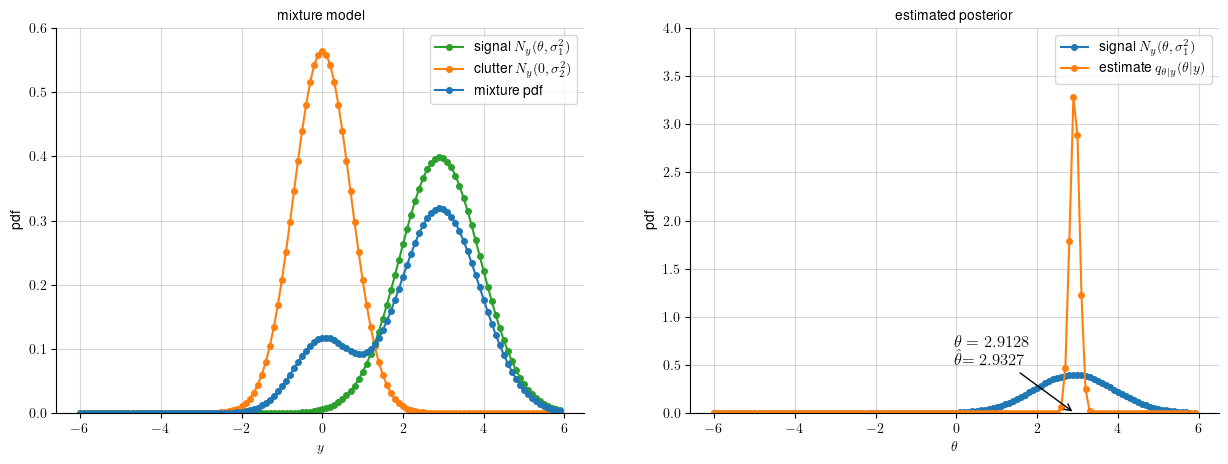

In [115]:
#figure 2 (Gaussian mixture)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.rcParams['figure.figsize']=15, 5
fig = plt.figure()

ax = fig.add_subplot(121)

ax.plot(zvec, f1, marker='o', markersize=4, label="signal $N_y(\\theta, \sigma_1^2)$", color="tab:green")
ax.plot(zvec, f2, marker='o', markersize=4, label="clutter $N_y(0, \sigma_2^2)$", color="tab:orange")
ax.plot(zvec, f, marker='o', markersize=4, label="mixture pdf", color="tab:blue")
ax.set_xlabel("$y$", fontsize=10)
ax.set_ylabel("pdf", fontsize=10)
ax.set_title("mixture model", fontsize=10)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)
ax.set_ylim([0, 0.6])
plt.legend()

ax = fig.add_subplot(122)

ax.plot(zvec, f1, marker='o', markersize=4, label="signal $N_y(\\theta, \sigma_1^2)$")
ax.plot(zvec, q_approx, marker='o', markersize=4, label="estimate $q_{\\theta|y}(\\theta|y)$")
ax.set_xlabel("$\\theta$", fontsize=10)
ax.set_ylabel("pdf", fontsize=10)
ax.set_title("estimated posterior", fontsize=10)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)
ax.annotate(f"$\\theta = {np.round(theta, 4)}$" + "\n $\hat{\\theta}$" + f"$ = {np.round(mu_ell, 4)}$", xy=(mu_ell, 0), xytext=(mu_ell-3, 0.5), arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontsize=12, fontweight='bold')
ax.set_ylim([0, 4])
plt.legend()

plt.show()

**Figure 34.2** ($\textit{Left}$) Gaussian mixture model consisting of two components: a clutter and a signal. The plot shows the separate components and their combination $f_n(\theta)=f_{y|\theta}(y|\theta)$. ($\textit{Right}$) The Gaussian signal component, which is centered at the value of $\theta$, along with the estimated posterior $q_{\theta|y}(\theta|y)$.